<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Multivariate-Exploration" data-toc-modified-id="Multivariate-Exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Multivariate Exploration</a></span></li></ul></div>

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

In [4]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

## Multivariate Exploration

In the previous workspace, you looked at various bivariate relationships. You saw that the log of price was approximately linearly related to the cube root of carat weight, as analogy to its length, width, and depth. You also saw that there was an unintuitive relationship between price and the categorical quality measures of cut, color, and clarity, that the median price decreased with increasing quality. Investigating the distributions more clearly and looking at the relationship between carat weight with the three categorical variables showed that this was due to carat size tending to be smaller for the diamonds with higher categorical grades.

The goal of this workspace will be to depict these interaction effects through the use of multivariate plots.

To start off with, create a plot of the relationship between price, carat, and clarity. In the previous workspace, you saw that clarity had the clearest interactions with price and carat. How clearly does this show up in a multivariate visualization?

C:\Users\Admin\anaconda3\envs\Udacity\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


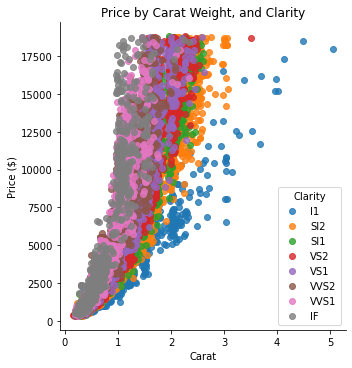

In [5]:
# multivariate plot of price by carat weight, and clarity

g = sb.FacetGrid(data = diamonds, hue = 'clarity', size = 5)
g.map(sb.regplot, 'carat', 'price', fit_reg=False, x_jitter=0.05)
plt.ylabel('Price ($)')
plt.xlabel('Carat')
plt.title('Price by Carat Weight, and Clarity')
plt.legend(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], title = 'Clarity');


Price by Carat and Clarity Comment 1: <span style="color:white">With two numeric variables and one categorical variable, there are two main plot types that make sense. A scatterplot with points colored by clarity level makes sense on paper, but the sheer number of points causes overplotting that suggests a different plot type. A faceted scatterplot or heat map is a better choice in this case.</span>

C:\Users\Admin\anaconda3\envs\Udacity\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


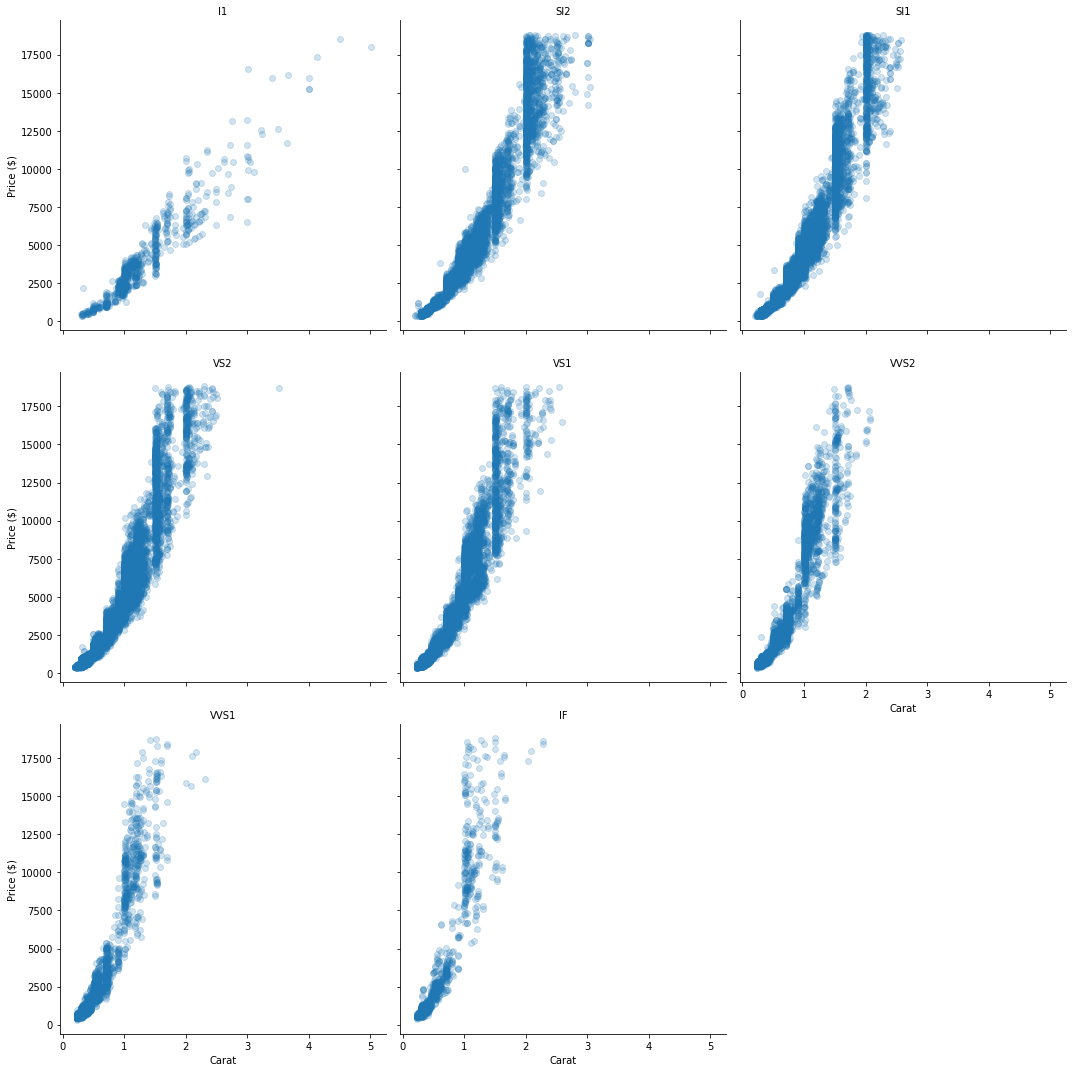

In [6]:
g = sb.FacetGrid(data = diamonds, col = 'clarity', size = 5, col_wrap = 3)
g.map(sb.regplot, 'carat', 'price', y_jitter=0.04, fit_reg=False, scatter_kws = {'alpha':1/5})
g.set_ylabels('Price ($)')
g.set_xlabels('Carat')
g.set_titles('{col_name}');

Price by Carat and Clarity Comment 2: <span style="color:white">You should see across facets the general movement of the points upwards and to the left, corresponding with smaller diamond sizes, but higher value for their sizes. As a final comment, did you remember to apply transformation functions to the price and carat values?</span>

C:\Users\Admin\anaconda3\envs\Udacity\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


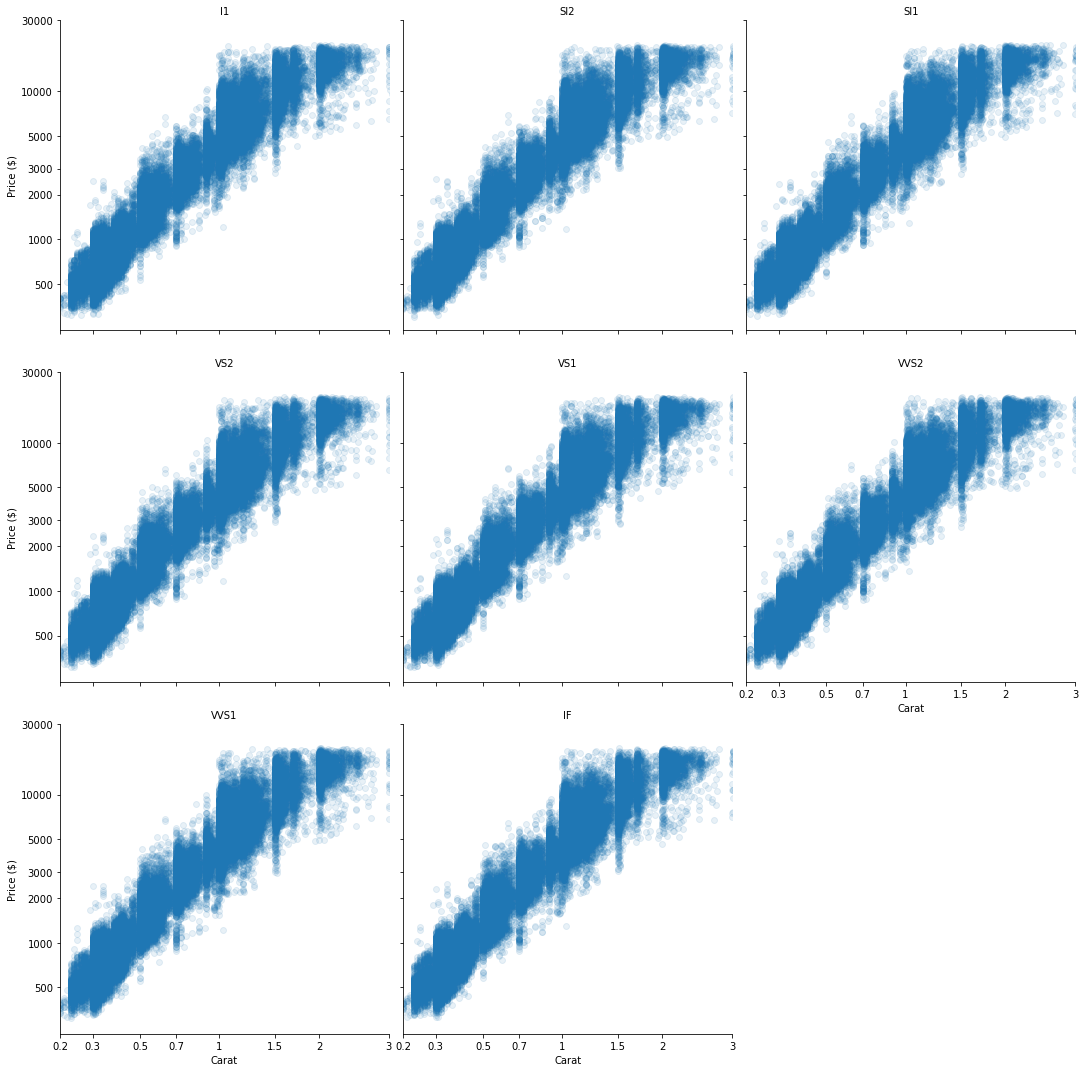

In [7]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
def cuberoot_trans(x, inverse=False):
    if not inverse:
        return np.power(x, 1/3)
    else:
        return np.power(x, 3)

g = sb.FacetGrid(data = diamonds, col = 'clarity', size = 5, col_wrap = 3)
g.map(sb.regplot, y= diamonds['price'].apply(log_trans), x=diamonds['carat'].apply(cuberoot_trans),
      y_jitter=0.04, fit_reg=False, scatter_kws = {'alpha':1/10})
ytick_locs = [500, 1000, 2000, 3000, 5000, 10000, 30000]
xtick_locs = [0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 3]
g.set_ylabels('Price ($)')
g.set_xlabels('Carat')
g.set_titles('{col_name}')
plt.xticks(cuberoot_trans(xtick_locs), xtick_locs)
plt.yticks(log_trans(ytick_locs), ytick_locs)
plt.xlim(cuberoot_trans(0.2),cuberoot_trans(3));

Let's try a different plot, for diamond price against cut and color quality features. To avoid the trap of higher quality grades being associated with smaller diamonds, and thus lower prices, we should focus our visualization on only a small range of diamond weights. For this plot, select diamonds in a small range around 1 carat weight. Try to make it so that your plot shows the effect of each of these categorical variables on the price of diamonds.

In [8]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [9]:
diamonds_sub = diamonds.query('carat > 0.9 and carat < 1.1')
diamonds_sub.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
97,0.96,Fair,F,SI2,66.3,62.0,2759,6.27,5.95,4.07
126,0.91,Premium,H,SI1,61.4,56.0,2763,6.09,5.97,3.70
128,0.91,Fair,H,SI2,64.4,57.0,2763,6.11,6.09,3.93
129,0.91,Fair,H,SI2,65.7,60.0,2763,6.03,5.99,3.95
204,0.98,Fair,H,SI2,67.9,60.0,2777,6.05,5.97,4.08


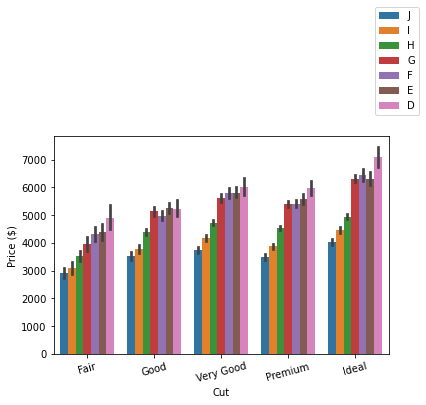

In [10]:
# multivariate plot of price by cut and color, for approx. 1 carat diamonds

sb.barplot(data=diamonds_sub, x='cut', y='price', hue='color')
plt.xticks(rotation=15);
plt.ylabel('Price ($)')
plt.xlabel('Cut')
plt.legend(loc = (0.96,1.1))

Price by Cut and Color Comment 1: <span style="color:white">There's a lot of ways that you could plot one numeric variable against two categorical variables. I think that the clustered box plot or the clustered point plot are the best choices in this case. With the number of category combinations to be plotted (7x5 = 35), it's hard to make full sense of a violin plot's narrow areas; simplicity is better. A clustered bar chart could work, but considering that price should be on a log scale, there isn't really a nice baseline that would work well.</span>

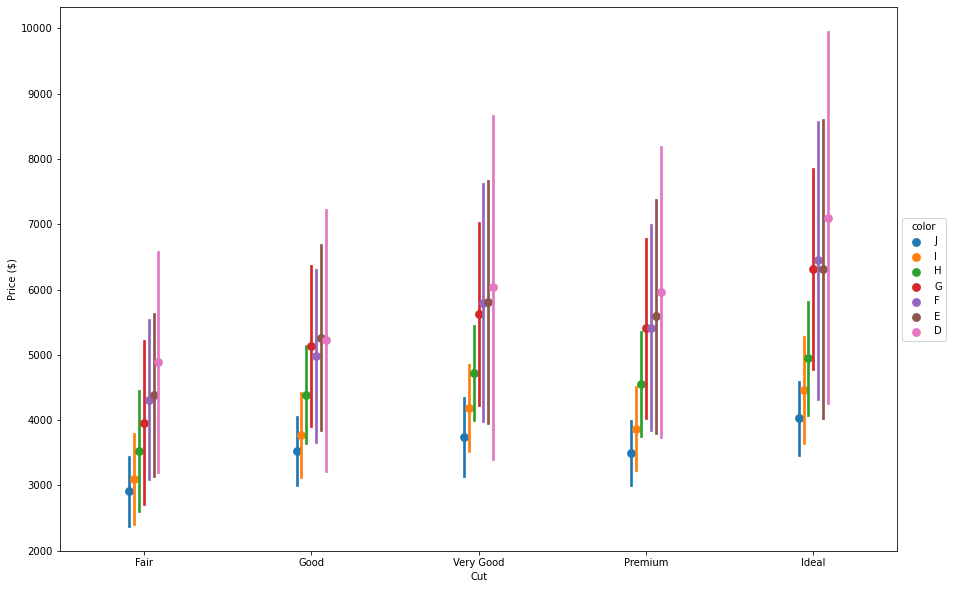

In [11]:
# using defined function from earlier
plt.figure(figsize=(15, 10))
sb.pointplot(data=diamonds_sub, x='cut', y= 'price', hue='color', ci='sd', 
             linestyles="", dodge=True);
plt.ylabel('Price ($)')
plt.xlabel('Cut')
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), title='color');

Price by Cut and Color Comment 2: <span style="color:white">Assuming you went with a clustered plot approach, you should see a gradual increase in price across the main x-value clusters, as well as generally upwards trends within each cluster for the third variable. Aesthetically, did you remember to choose a sequential color scheme for whichever variable you chose for your third variable, to override the default qualitative scheme? If you chose a point plot, did you set a dodge parameter to spread the clusters out? </span>

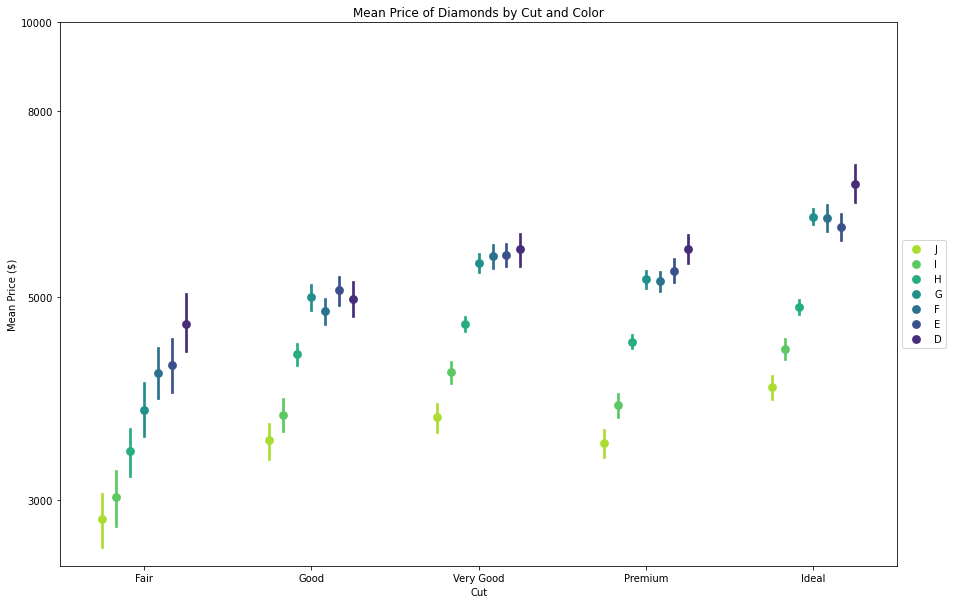

In [12]:
plt.figure(figsize=(15, 10))
sb.pointplot(data=diamonds_sub, x='cut', y= diamonds_sub['price'].apply(log_trans), hue='color', 
             linestyles="", dodge=0.5, palette= "viridis_r");
plt.ylabel('Mean Price ($)')
plt.xlabel('Cut')
ytick_locs = [3000, 5000, 8000, 10000]
plt.yticks(log_trans(ytick_locs), ytick_locs)
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
plt.title('Mean Price of Diamonds by Cut and Color');